In [ ]:
import hashlib
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# load the dataset
df = pd.read_csv('/content/ecg_data_t.csv')
x_data = df['Time'][:2000].values
y_data = df['DATA'][:2000].values
dataset = df.astype('float32')
print('Original Data\n',y_data)

Original Data
 [347 348 349 ... 342 344 356]


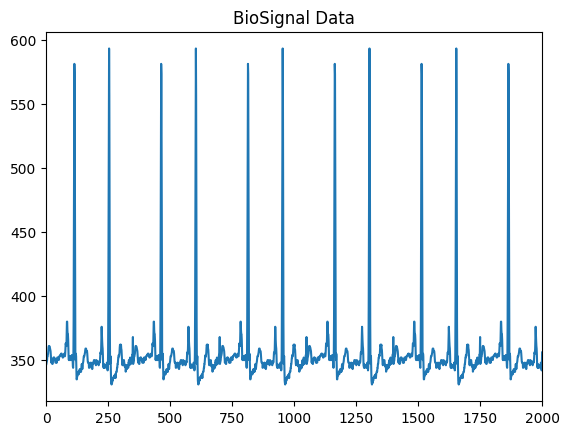

In [ ]:
# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_data_normalized = scaler_x.fit_transform(x_data.reshape(-1,1))
y_data_normalized = scaler_y.fit_transform(y_data.reshape(-1, 1)).ravel()

plt.plot(x_data , y_data)
plt.title('BioSignal Data')
plt.xlim(0,2000)
plt.show()

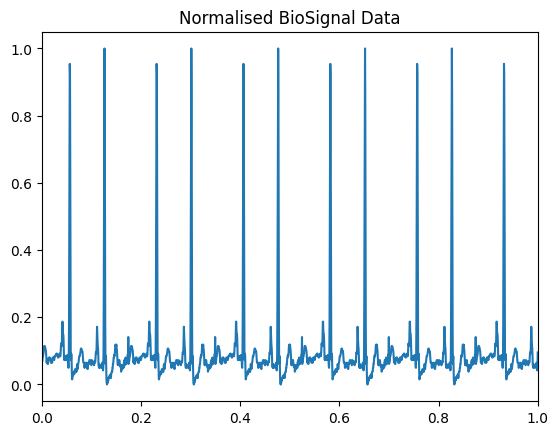

In [ ]:
plt.plot(x_data_normalized , y_data_normalized)
plt.xlim(0,1)
plt.title('Normalised BioSignal Data')
plt.show()

In [ ]:
import sympy as sp

def hermite_forward(x, n):
  hrm_block = []
  for xi in x:
    if n == 1:
        hrm_block.append(xi + 2)
    elif n == 2:
        hrm_block.append(xi*2 - xi + 2)
    elif n == 3:
        hrm_block.append(xi*3 - xi*2 + 2)
    elif n == 4:
        hrm_block.append(xi*4 - xi*3 + 2)
    elif n == 5:
        hrm_block.append(xi*5 - xi*4 + 2)
    elif n == 6:
        hrm_block.append(xi*6 - xi*5 + 2)
    else:
        raise ValueError("Invalid value of n, must be between 1 and 6")
  return hrm_block

In [ ]:
def reverse_hermite(y, n):
    x = sp.Symbol('x')
    equation = None
    if n == 1:
        equation = x - (y - 2)
    elif n == 2:
        equation = x*2 - x - (y - 2)
    elif n == 3:
        equation = x*3 - x*2 - (y - 2)
    elif n == 4:
        equation = x*4 - x*3 - (y - 2)
    elif n == 5:
        equation = x*5 - x*4 - (y - 2)
    elif n == 6:
        equation = x*6 - x*5 - (y - 2)
    else:
        raise ValueError("Invalid value of n, must be between 1 and 6")

    solutions = sp.solve(equation, x)
    # Filter out any complex solutions
    real_solutions = [sol.evalf() for sol in solutions if sol.is_real]
    return real_solutions

In [ ]:
 # Order of Hermite Function
 n = 1

In [ ]:
import random

ste_block = []

def embed_algorithm(cover_block,a):
    stego_block = []
    i=0
    block = []
    j=0
    cnt=1
    single_block = []
    ss_block = []
    x=0
    for yi in cover_block:
        single_block.append(yi)
        if(cnt == 4):
          block.append(hermite_forward(single_block,n))
          cnt = 0
          single_block.clear()
        cnt = cnt+1
    print("Block",block)
    for s_block in block:
      for yi in s_block:
        b1=int(a[x])
        b2=int(a[x+1])
        x+=2
        if x==len(a):
          x=0
        Y1 = round(yi, 3)
        y1 = str(Y1)
        y1=y1[:4]
        Y2 = float(y1)
        Sn = np.sign(Y1)
        p = int((Y1 * 1e3) % 10)
        p1 = round(p / 2)
        p2 = p - p1 + 1

        if b1 == 0 and b2 == 0:
            yadd = 0.0
            yfix = p
        else:
            yadd = p2 * ((b1 * 10) + b2)
            yfix = p1

        tilde_yi = Sn * ((Y2) + (yfix * 1e-3) + (yadd * 1e-5))
        tilde_yi=reverse_hermite(tilde_yi,n)
        ss_block.append(str(tilde_yi[0]))
        #print("ss_block",ss_block)
    for i in range(0,len(ss_block),4):
      ste_block.append(ss_block[i:i+4])
    print("stego_block",ste_block)
    return ste_block

In [ ]:
def generate_hash(data):
    hash_object = hashlib.sha256(str(data).encode())
    return hash_object.hexdigest()

In [ ]:
def string_to_binary(input_string):
    binary_result = ''.join(format(ord(char), '08b') for char in input_string)
    return binary_result

input_string = "attacktonight"
print("Secret Information: ",input_string)
binary_representation = string_to_binary(input_string)
print("Secret Information in Binary: ",binary_representation)

cover_block = y_data
print("Original Data: ",cover_block)
ste = embed_algorithm(cover_block,binary_representation)
#hashes = [generate_hash(ste[i] + ste[i + 1]) for i in range(len(ste) - 1)]
if len(ste) <= 1:
    hashes = generate_hash(ste)
else:
    hashes = [generate_hash(ste[i] + ste[i + 1]) for i in range(len(ste) - 1)]
print("Passwords:", hashes)
f = open('Data.txt','w')
ste_str = ''
for i in ste:
    ste_str = ste_str + str(i) +' '
f.write(ste_str)
f.close()
f1 = open('Password.txt','w')
pass_str=''
for i in hashes:
    pass_str = pass_str + str(i) +' '
f1.write(pass_str)
f1.close()

Secret Information:  attacktonight
Secret Information in Binary:  01100001011101000111010001100001011000110110101101110100011011110110111001101001011001110110100001110100
Original Data:  [347 348 349 ... 342 344 356]
Block [[349, 350, 351, 352], [355, 355, 356, 357], [359, 362, 363, 363], [363, 362, 362, 361], [360, 359, 356, 352], [350, 352, 353, 351], [349, 349, 351, 352], [353, 354, 352, 353], [354, 352, 352, 353], [352, 350, 350, 351], [351, 351, 350, 352], [354, 354, 353, 353], [354, 353, 352, 353], [355, 355, 355, 355], [356, 356, 356, 357], [356, 357, 357, 356], [355, 355, 354, 354], [355, 356, 355, 356], [357, 355, 355, 355], [357, 361, 365, 364], [363, 363, 372, 382], [382, 375, 372, 372], [368, 359, 353, 352], [354, 355, 353, 352], [354, 355, 354, 352], [352, 353, 354, 356], [355, 355, 352, 347], [346, 353, 382, 442], [521, 583, 575, 498], [408, 357, 352, 357], [355, 345, 337, 337], [339, 340, 340, 341], [342, 342, 343, 341], [342, 344, 344, 345], [345, 343, 343, 344], [343, 

In [ ]:
from keras.models import load_model
MLP = load_model("/content/mlp.h5")

In [ ]:
n1=1

In [ ]:
import sympy as sp
def hermite_forward(x, n):
    x = float(x)
    if n == 1:
        return x + 2
    elif n == 2:
        return x**2 - x + 2
    elif n == 3:
        return x*3 - x*2 + 2
    elif n == 4:
        return x*4 - x*3 + 2
    elif n == 5:
        return x*5 - x*4 + 2
    elif n == 6:
        return x*6 - x*5 + 2
    else:
        raise ValueError("Invalid value of n, must be between 1 and 6")

In [ ]:
def reconstruction_algorithm(stego_block):
    reconstructed_block = []
    exect = []
    for i in stego_block:
        for yi in i:
            yi = hermite_forward(yi,n1)
            Z1 = round(yi, 5)
            z1 = str(Z1)
            z1 = z1[:4]
            Z2 = abs(float(z1))
            Sn = np.sign(Z1)
            yfix = int((abs(Z1) * 1e3) % 10)
            q2 = int((abs(Z1) * 1e4) % 10)
            q3 = int((abs(Z1) * 1e5) % 10)


            if ((q2 == 0) and (q3 == 0)):
                b1, b2 = 0, 0
            else:
                qn = int(((q2 * 10) + q3) / 11)
                if (((q2 * 10) + q3) % 11) == 0:
                    b1, b2 = 1, 1
                elif (((q2 * 10) + q3) % 10 )== 0:
                    b1, b2 = 1, 0
                elif (((q2 * 10) + q3) % 1) == 0:
                    b1, b2 = 0, 1
                yfix = yfix + qn - 1
            exect.append(str(b1)+str(b2))
            hat_yi = Sn * (Z2 + (yfix * 1e-3))
            hat_yi=reverse_hermite(hat_yi,n1)
            #print("REv",hat_yi)
            hat_yi = round(hat_yi[0])
            #print("Round",hat_yi)
            reconstructed_block.append(hat_yi)

    print('Recovered Data',reconstructed_block)
    print('Extracted bit',exect)
    return reconstructed_block

In [ ]:
f = open('Data.txt','r')
ste_str = f.read()
ste_str = ste_str.replace('[','')
ste_str = ste_str.replace(']','')
ste_str = ste_str.replace(',','')
ste_str = ste_str.replace('\'','')
#print("ser",ste_str)
ste_str = ste_str.split()
ste = []
for i in ste_str:
    ste.append(i)
f.close()
#print('Received data',ste)

cnt=0
block = []


block =[ste[i:i + 4] for i in range(0, len(ste), 4)]
ste = block

print("stego_block",ste)
f1 = open('Password.txt','r')
pass_str = f1.read()
generated_hash = pass_str.split()
f1.close()
print('Received Password',generated_hash)

received_data_stream = ste
j=0

pos=[]
received_hashes = [generate_hash(received_data_stream[i] + received_data_stream[i + 1]) for i in range(len(received_data_stream) - 1)]
print('Password for Received Stego Data',received_hashes)

rh = 0
pos.append(rh)
for rh in range(len(generated_hash)):
  if generated_hash[rh] in received_hashes:
    pos.append(rh+1)

vr_data=[]


missed_pos = []
nonmissed_pos = []
n = len(generated_hash)+1
j=0
flg=0


for i in range(1,n):
  if i in pos:
    nonmissed_pos.append(i)
  else:
    missed_pos.append(i)

for i in range(len(missed_pos)):
  if(i%2==0):
    nonmissed_pos.append(missed_pos[i])
    del missed_pos[i]

nonmissed_pos = sorted(nonmissed_pos)
print("Miss",missed_pos)

pred_data = []
for i in missed_pos:
  data = []
  for k in range(((i-1)*4)+1,(i*4)+1):
    position = np.array([[k]])
    position_normalized = scaler_x.transform(position)
    data_pred_normalized = MLP.predict(position_normalized)[0, 0]
    data_pred = scaler_y.inverse_transform([[data_pred_normalized]])[0, 0]
    data.append(str(data_pred))
  pred_data.append(data)

print("Predicted Data Block: ",pred_data)

j=0
k=0
for i in range(1,n):
  if i in nonmissed_pos:
    vr_data.append(ste[k])
    k=k+1
  else:
    vr_data.append(pred_data[j])
    j=j+1
vr_data.append(ste[k])
print("Reconstructed Block",vr_data)
rec = reconstruction_algorithm(vr_data)


stego_block [['347.000010000000', '348.000100000000', '349.000000000000', '350.000010000000'], ['353.000010000000', '353.000110000000', '354.000010000000', '355.000000000000'], ['357.000010000000', '360.000110000000', '361.000000000000', '361.000000000000'], ['361.000000000000', '360.000100000000', '360.000000000000', '359.000010000000'], ['348.000010000000', '350.000100000000', '351.000100000000', '349.000110000000'], ['347.000010000000', '347.000110000000', '349.000010000000', '350.000000000000'], ['351.000010000000', '352.000100000000', '350.000110000000', '351.000110000000'], ['352.000010000000', '350.000100000000', '350.000110000000', '351.000100000000'], ['350.000010000000', '348.000100000000', '348.000100000000', '349.000010000000'], ['349.000010000000', '349.000100000000', '348.000010000000', '350.000110000000'], ['352.000010000000', '352.000100000000', '351.000100000000', '351.000000000000'], ['352.000010000000', '351.000110000000', '350.000010000000', '351.000000000000'], ['3

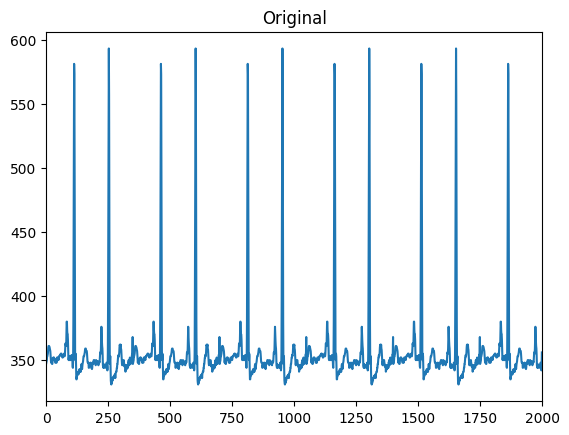

In [ ]:
plt.plot(cover_block)
plt.title('Original')
plt.xlim(0,2000)
plt.show()

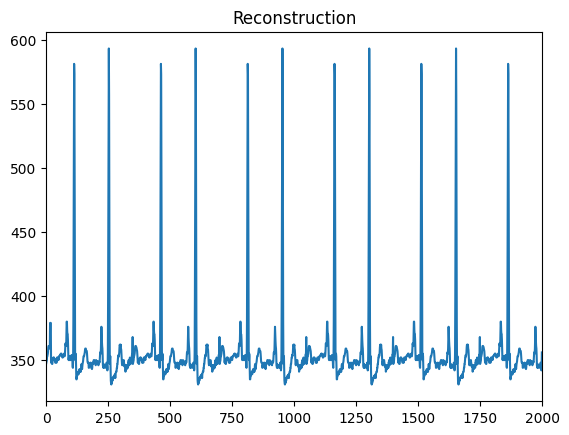

In [ ]:
plt.plot(rec)
plt.title('Reconstruction')
plt.xlim(0,2000)
plt.show()

In [ ]:
 from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_psnr(y_true, y_pred, max_value=255):
    rmse = calculate_rmse(y_true, y_pred)
    print('RMSE value : ',rmse)
    if(rmse == 0):
      print("The Recovered Data is same as Original Data")
      return
    else:
      psnr = 20 * math.log10(max_value / rmse)
      return psnr

P_values = cover_block

Q_values = rec
psnr_value = calculate_psnr(np.array(P_values), np.array(Q_values))
print(f"PSNR value : {psnr_value} dB")

RMSE value :  1.0933892262136116
PSNR value : 47.355307804161164 dB
